# Import

In [83]:
import numpy as np
import random
from scipy.stats import spearmanr, pearsonr
from scipy.optimize import fsolve

#import the custom functions
import MFunctions as mf

In [84]:
#Load verb_symilarity from which we extract the pairs
simdict = mf.verb_similarity("SimVerb-3500.txt")

# Preliminary loading

## Choosing the seeds for the various samples

In [3]:
#Experiment 2 requires averaging over a number of different random samples. To generate these in a way 
#which is random but repeatable we need a list of seeds for the random generator. We decided to pick 20 samples

#seed the random generator before genearting the integer seeds for the random samples
random.seed(7)

seed_list = [(random.randint(0,5000),random.randint(0,5000)) for a in range(20)]

#Make a second seed_list for when we need 3 seeds instead of 2

seed_list2 = [(random.randint(0,5000),random.randint(0,5000),random.randint(0,5000)) for a in range(20)]

## 13 obs defs

In [4]:
# Make observables object
set1 = mf.observables(["Linear.txt","Quadratic.txt"])
# Load matrices and make vector dictionaries
objsubset1 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set1)
subobjset1 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set1,[0])
obj08sub02set1 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set1,[1])
obj09sub01set1 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set1,[1])

file_list1 = [objsubset1,obj09sub01set1,obj08sub02set1,subobjset1]

## 15 obs defs

In [5]:
# Make observables object
set2 = mf.observables(["Cubic1.txt","Quartic1.txt"])
# Load matrices and make vector dictionaries
objsubset2 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set2)
subobjset2 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set2,[0])
obj08sub02set2 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set2,[1])
obj09sub01set2 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set2,[1])

file_list2 = [objsubset2,obj09sub01set2,obj08sub02set2,subobjset2]

## 28 obs defs

In [6]:
# Make observables object
set3 = mf.observables(["Linear.txt","Quadratic.txt","Cubic1.txt","Quartic1.txt","Additional1.txt"])
# Load matrices and make vector dictionaries
objsubset3 = mf.vector_dictionary("matrices_1160_arg_obj_context_subj.txt",set3)
subobjset3 = mf.vector_dictionary("matrices_1160_arg_subj_context_obj.txt",set3,[0])
obj08sub02set3 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.8,0.2]],set3,[1])
obj09sub01set3 = mf.vector_dictionary([["matrices_1160_arg_obj_context_subj.txt","matrices_1160_arg_subj_context_obj.txt"],[0.9,0.1]],set3,[1])

file_list3 = [objsubset3,obj09sub01set3,obj08sub02set3,subobjset3]

# Observable deviation vectors

## Some plots

In [7]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [8]:
# Use as data the inner products of the vectors. Data of synonyms
syndat = {'syn' : [a for a in mf.averaged_product_list(simdict,'SYNONYMS',objsubset1,"std_dev").values()]}
syndat = pd.DataFrame(data = syndat)
#Antonym data
antdat = {'ant' : [a for a in mf.averaged_product_list(simdict,'ANTONYMS',objsubset1,"std_dev").values()]}
antdat = pd.DataFrame(data = antdat)
#None dat
nondat = {'none' : [a for a in mf.averaged_product_list(simdict,'NONE',objsubset1,"std_dev").values()]}
nondat = pd.DataFrame(data = nondat)
#Cohypo
cohdat = {'cohypo' : [a for a in mf.averaged_product_list(simdict,'COHYPONYMS',objsubset1,"std_dev").values()]}
cohdat = pd.DataFrame(data = cohdat)
#Hyper/hypo
hypdat = {'hyper/hypo' : [a for a in mf.averaged_product_list(simdict,'HYPER/HYPONYMS',objsubset1,"std_dev").values()]}
hypdat = pd.DataFrame(data = hypdat)

In [9]:
#Apply default theme for seaborn
sns.set_theme()

<AxesSubplot:ylabel='Count'>

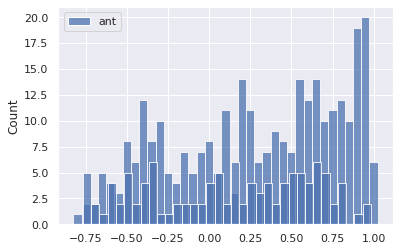

In [10]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

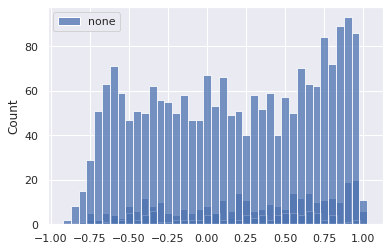

In [11]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)
sns.histplot(data = nondat, binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

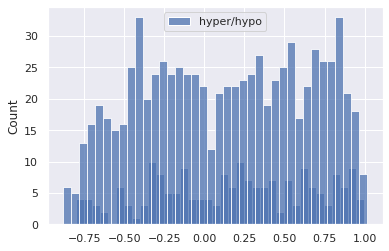

In [12]:
sns.histplot(data = cohdat, binwidth = 0.05)
sns.histplot(data = hypdat, binwidth = 0.05)

In [16]:
# Use as data the inner products of the vectors. Data of synonyms
syndat = {'syn' : [a for a in mf.averaged_product_list(simdict,'SYNONYMS',subobjset3,"std_dev").values()]}
syndat = pd.DataFrame(data = syndat)
#Antonym data
antdat = {'ant' : [a for a in mf.averaged_product_list(simdict,'ANTONYMS',subobjset3,"std_dev").values()]}
antdat = pd.DataFrame(data = antdat)
#None dat
nondat = {'none' : [a for a in mf.averaged_product_list(simdict,'NONE',subobjset3,"std_dev").values()]}
nondat = pd.DataFrame(data = nondat)
#Cohypo
cohdat = {'cohypo' : [a for a in mf.averaged_product_list(simdict,'COHYPONYMS',subobjset3,"std_dev").values()]}
cohdat = pd.DataFrame(data = cohdat)
#Hyper/hypo
hypdat = {'hyper/hypo' : [a for a in mf.averaged_product_list(simdict,'HYPER/HYPONYMS',subobjset3,"std_dev").values()]}
hypdat = pd.DataFrame(data = hypdat)

In [14]:
#Apply default theme for seaborn
sns.set_theme()

<AxesSubplot:ylabel='Count'>

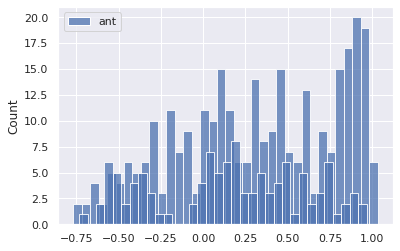

In [15]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)

<AxesSubplot:ylabel='Probability'>

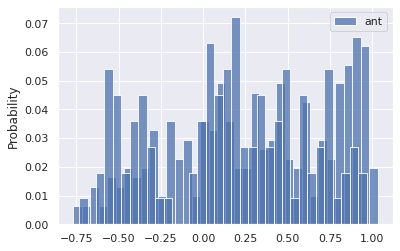

In [26]:
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability")
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability")

<AxesSubplot:ylabel='Probability'>

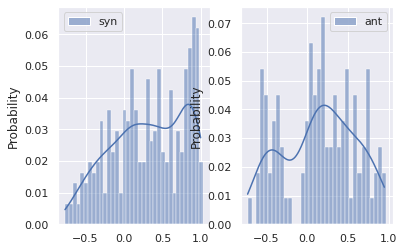

In [29]:
fig, axes = plt.subplots(1,2)
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[0],kde=True)
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[1],kde=True)

<AxesSubplot:ylabel='Count'>

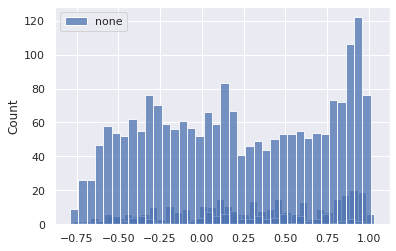

In [16]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)
sns.histplot(data = nondat, binwidth = 0.05)

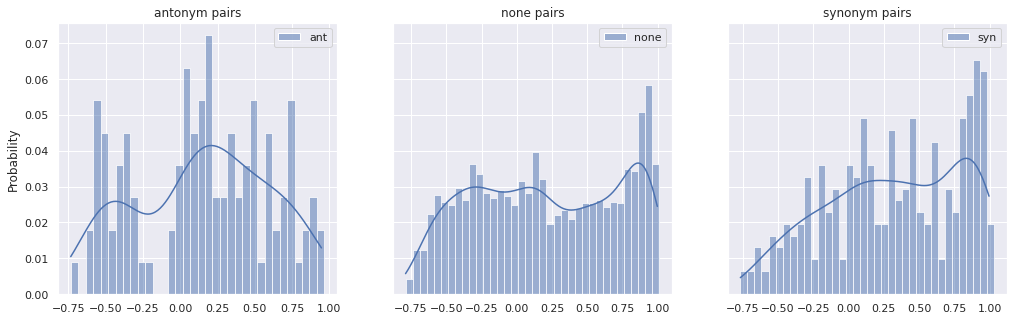

In [30]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
#axes[0].set_ylim(0,0.1)
#axes[0].set_xlim(-1,1)
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2],kde=True)
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0],kde=True)
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1],kde=True)
fig.savefig("diagonal_with_lines.png")

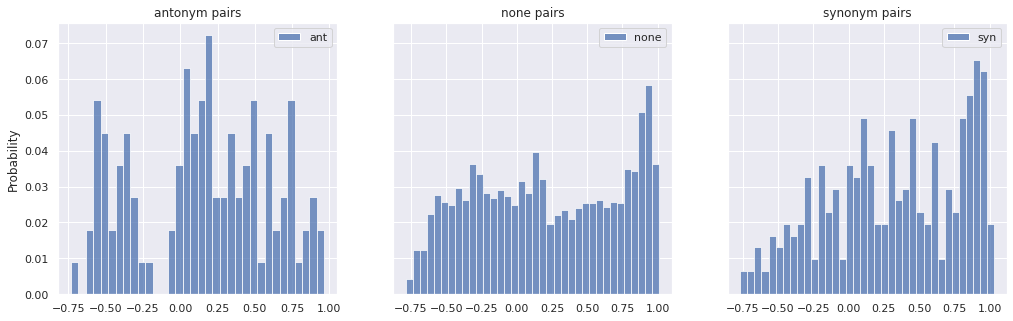

In [31]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2])
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0])
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1])
fig.savefig("diagonal_no_lines.png")

<AxesSubplot:ylabel='Count'>

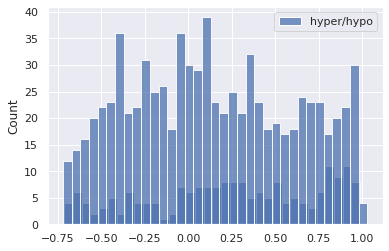

In [17]:
sns.histplot(data = cohdat, binwidth = 0.05)
sns.histplot(data = hypdat, binwidth = 0.05)

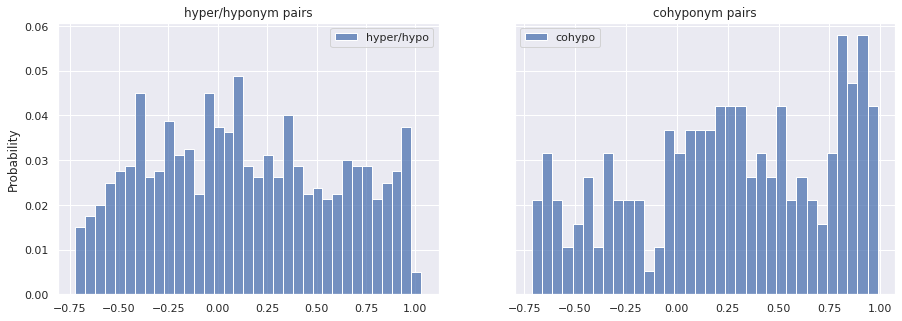

In [39]:
fig, axes = plt.subplots(1,2,figsize=(15,5),sharey = True)
axes[0].set_title("hyper/hyponym pairs")
axes[1].set_title("cohyponym pairs")
sns.histplot(data = hypdat, binwidth = 0.05,stat = "probability",ax = axes[0])
sns.histplot(data = cohdat, binwidth = 0.05,stat = "probability",ax = axes[1])
fig.savefig("diagonal_no_lines_hyp.png")

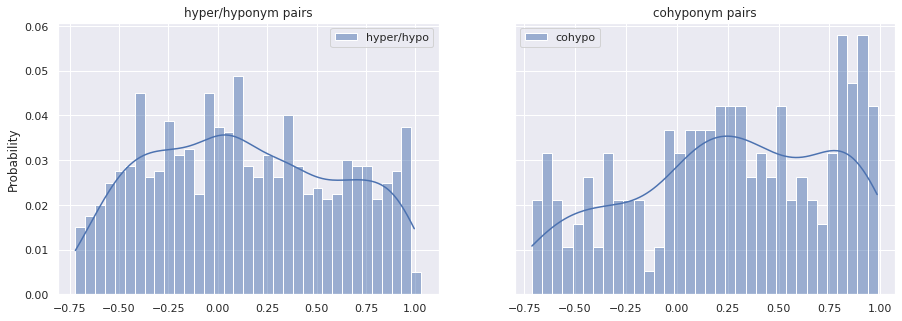

In [40]:
fig, axes = plt.subplots(1,2,figsize=(15,5),sharey = True)
axes[0].set_title("hyper/hyponym pairs")
axes[1].set_title("cohyponym pairs")
sns.histplot(data = hypdat, binwidth = 0.05,stat = "probability",ax = axes[0],kde=True)
sns.histplot(data = cohdat, binwidth = 0.05,stat = "probability",ax = axes[1],kde=True)
fig.savefig("diagonal_with_lines_hyp.png")

In [34]:
print(mf.averaged_product(simdict,'HYPER/HYPONYMS',subobjset3,'maha'))
print(mf.averaged_product(simdict,'COHYPONYMS',subobjset3,'maha'))

[0.05637290815348894, 0.32174248346655265]
[0.1141253941249292, 0.3602126910632807]


## Precision is computed by averaging: function definition

In [ ]:
'''We decided to compute the recall on the binary classification problems: syn vs ant, syn vs non-syn,
   ant vs non-ant and hyper vs cohypo. Also, we compute the precision on the predictions for some of these classes'''

In [ ]:
# We decided to compute the precision by averaging over the precision in each category, which scales well
# for cases where the sample sizes are very different for syn/non/ant (we have ~300 syn ~100 ant ~2000 none)

In [55]:
def synvsant1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [8]:
def synvsnonsyn1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['ANTONYMS','NONE'],file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,['ANTONYMS','NONE'],file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [9]:
def antvsnonant1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['SYNONYMS','NONE'],file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,['SYNONYMS','NONE'],file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [10]:
def hypohyper1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'COHYPONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'HYPER/HYPONYMS',file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    return recall1

In [11]:
def synvsnonevsant1(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")
    
    #Compute the mean and the standard deviation for the NONE
    non1 = mf.averaged_product(simdict,'NONE',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")

    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + np.arctan(non1[1]/syn1[1]) * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + np.arctan(ant1[1]/non1[1]) * (non1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")

    prodlist9 = mf.averaged_product_list(simdict,'NONE',file_name,"std_dev")

    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(prodlist9.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))

    return precision1

## Precision is computed by averaging: use better definition for divide

In [ ]:
'''We decided to compute the recall on the binary classification problems: syn vs ant, syn vs non-syn,
   ant vs non-ant and hyper vs cohypo. Also, we compute the precision on the predictions for some of these classes'''

In [ ]:
# We decided to compute the precision by averaging over the precision in each category, which scales well
# for cases where the sample sizes are very different for syn/non/ant (we have ~300 syn ~100 ant ~2000 none)

In [71]:
def synvsant3(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4/np.pi * np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [72]:
def synvsnonsyn3(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['ANTONYMS','NONE'],file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4/np.pi * np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,['ANTONYMS','NONE'],file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [73]:
def antvsnonant3(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['SYNONYMS','NONE'],file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4/np.pi * np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,['SYNONYMS','NONE'],file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [74]:
def hypohyper3(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'COHYPONYMS',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'HYPER/HYPONYMS',file_name,"std_dev")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4/np.pi * np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"std_dev")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    return recall1

In [75]:
def synvsnonevsant3(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"std_dev")
    
    #Compute the mean and the standard deviation for the NONE
    non1 = mf.averaged_product(simdict,'NONE',file_name,"std_dev")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"std_dev")

    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + 4/np.pi*np.arctan(non1[1]/syn1[1]) * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + 4/np.pi*np.arctan(ant1[1]/non1[1]) * (non1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")

    prodlist9 = mf.averaged_product_list(simdict,'NONE',file_name,"std_dev")

    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(prodlist9.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))

    return precision1

In [76]:
def synvsnonevsant3a(file_name,myseed1,myseed2,myseed3,samplesize1,samplesize2,samplesize3):
    
    #Since here we use just a subset of the pairs of synonyms and antonyms to determine the means and deviation, we have to do this by hand

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"std_dev")

    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 7
    random.seed(myseed1)

    mysample = random.sample(list(all1),samplesize1)

    #Find complementary sample where we will predict and test
    mycomplsample = set(all1.keys()) - set(mysample)

    #Compute the means and standard deviations
    syn1 = [np.mean(np.array(list(map(all1.get,mysample)))),np.std(np.array(list(map(all1.get,mysample))))]

    #Now the same thing for the antonyms

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"std_dev")
    
    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    random.seed(myseed2)

    mysample2 = random.sample(list(all5),samplesize2)

    #Find complementary sample where we will predict and test
    mycomplsample2 = set(all5.keys()) - set(mysample2)

    #Compute the means and standard deviations
    ant1 = [np.mean(np.array(list(map(all5.get,mysample2)))),np.std(np.array(list(map(all5.get,mysample2))))]
    
    #Finally the same for None

    #Compute the products for all the observable deviation vectors associated to the SYNONYMS pairs
    all9 = mf.averaged_product_list(simdict,'NONE',file_name,"std_dev")
    
    #The subset from which we copute the means is randomly selected, we seed the random generator for repeatable results. Chosen seed 13
    random.seed(myseed3)

    mysample3 = random.sample(list(all9),samplesize3)

    #Find complementary sample where we will predict and test
    mycomplsample3 = set(all9.keys()) - set(mysample3)

    #Compute the means and standard deviations
    non1 = [np.mean(np.array(list(map(all9.get,mysample3)))),np.std(np.array(list(map(all9.get,mysample3))))]
    
    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + 4/np.pi*np.arctan(non1[1]/syn1[1]) * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + 4/np.pi*np.arctan(ant1[1]/non1[1]) * (non1[0]-ant1[0])/2
    
    # Next we test on the complementary sample
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(map(all1.get,mycomplsample))]


    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(map(all9.get,mycomplsample3))]
    
    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(map(all5.get,mycomplsample2))]
    
    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))
    
    return precision1

## Recall syn vs ant

In [78]:
# Experiment 1 synonym vs antonym
[[synvsant1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5602808691043986,
  0.5545398339515986,
  0.5565712771595125,
  0.5234499205087441],
 [0.5787405052110934,
  0.5684949655537891,
  0.5754725313548843,
  0.5537007595831125],
 [0.5562179826885709,
  0.5607224871930754,
  0.5779014308426074,
  0.5635930047694753]]

In [77]:
# Experiment 1 synonym vs antonym
[[synvsant3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5602808691043986,
  0.5545398339515986,
  0.5565712771595125,
  0.5234499205087441],
 [0.5787405052110934,
  0.5697314962020844,
  0.5738385444267797,
  0.5537007595831125],
 [0.5545839957604664,
  0.5652269916975798,
  0.5779014308426074,
  0.5635930047694753]]

## Recall syn vs non-syn

In [23]:
# Experiment 1 synonym vs antonym
[[synvsnonsyn1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.549286502259706,
  0.5644461051208143,
  0.5683946597392737,
  0.5495133625137896],
 [0.5218734801845724,
  0.5320391919623264,
  0.5285903230015538,
  0.5075012158523422],
 [0.5406139164679786,
  0.5456967723568555,
  0.5562272398372536,
  0.5544123578045859]]

In [18]:
# Experiment 1 synonym vs antonym
[[synvsnonsyn3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5498781182164336,
  0.5634037341494371,
  0.5655374067352289,
  0.5501049784705171],
 [0.5214657248259256,
  0.5307239955873456,
  0.5261408253561557,
  0.5103154692003844],
 [0.5388449995848309,
  0.5464233182686262,
  0.554458322954106,
  0.5547311483577098]]

## Recall ant vs non-ant

In [24]:
# Experiment 1 synonym vs antonym
[[antvsnonant1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.4996939415447127,
  0.5006553030729771,
  0.4966953197465911,
  0.5265125483966668],
 [0.4431857868706556,
  0.4598256030102633,
  0.46404094799259454,
  0.44787805729864916],
 [0.4848022261527889,
  0.4700381915888377,
  0.4679539898381082,
  0.48834536912902904]]

In [19]:
# Experiment 1 synonym vs antonym
[[antvsnonant3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5001107818948586,
  0.5021142442984877,
  0.49510869769310784,
  0.5292220106726151],
 [0.44084622346398084,
  0.4581113001288074,
  0.4659974689153513,
  0.45121278009981636],
 [0.47996162064523884,
  0.47504027579058844,
  0.4688684098855004,
  0.49188851210526907]]

## Recall Hyper vs Hypo

In [25]:
# Experiment 1 synonym vs antonym
[[hypohyper1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5248026315789474,
  0.5194078947368421,
  0.5286842105263159,
  0.5505921052631579],
 [0.5328947368421053,
  0.5220065789473685,
  0.5242763157894736,
  0.5445065789473684],
 [0.5319078947368421,
  0.5445394736842105,
  0.5438157894736843,
  0.5655921052631578]]

In [21]:
# Experiment 1 synonym vs antonym
[[hypohyper3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5261842105263158,
  0.5254276315789475,
  0.5288157894736842,
  0.5546052631578948],
 [0.5330263157894737,
  0.5201315789473684,
  0.5270394736842106,
  0.5460197368421053],
 [0.5327960526315789,
  0.5440460526315789,
  0.5458223684210526,
  0.5669736842105264]]

In [70]:
4 / np.pi * np.arctan(1)

1.0

## Recall Hyper vs Hypo

In [25]:
# Experiment 1 synonym vs antonym
[[hypohyper1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5248026315789474,
  0.5194078947368421,
  0.5286842105263159,
  0.5505921052631579],
 [0.5328947368421053,
  0.5220065789473685,
  0.5242763157894736,
  0.5445065789473684],
 [0.5319078947368421,
  0.5445394736842105,
  0.5438157894736843,
  0.5655921052631578]]

In [21]:
# Experiment 1 synonym vs antonym
[[hypohyper3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5261842105263158,
  0.5254276315789475,
  0.5288157894736842,
  0.5546052631578948],
 [0.5330263157894737,
  0.5201315789473684,
  0.5270394736842106,
  0.5460197368421053],
 [0.5327960526315789,
  0.5440460526315789,
  0.5458223684210526,
  0.5669736842105264]]

In [25]:
# Experiment 1 synonym vs antonym
[[hypohyper1(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5248026315789474,
  0.5194078947368421,
  0.5286842105263159,
  0.5505921052631579],
 [0.5328947368421053,
  0.5220065789473685,
  0.5242763157894736,
  0.5445065789473684],
 [0.5319078947368421,
  0.5445394736842105,
  0.5438157894736843,
  0.5655921052631578]]

In [21]:
# Experiment 1 synonym vs antonym
[[hypohyper3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5261842105263158,
  0.5254276315789475,
  0.5288157894736842,
  0.5546052631578948],
 [0.5330263157894737,
  0.5201315789473684,
  0.5270394736842106,
  0.5460197368421053],
 [0.5327960526315789,
  0.5440460526315789,
  0.5458223684210526,
  0.5669736842105264]]

## Recall Syn vs None vs Ant

In [80]:
# Experiment 1 synonym vs antonym vs none with arctan divide
[[synvsnonevsant3(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.35955434932417024,
  0.3720657083828439,
  0.37631475099505785,
  0.3464504666550702],
 [0.3822739295885076,
  0.37650739185266047,
  0.3737121090062266,
  0.37028718102886904],
 [0.3665683192537412,
  0.37871154367318055,
  0.3869738601196402,
  0.3738240643611487]]

In [79]:
# Synonyms vs Antonyms, sample size 60%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant3a(myfile,*a,200,70,1360) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.36077569, 0.02359251],
        [0.37103494, 0.025398  ],
        [0.3712687 , 0.02525421],
        [0.35007486, 0.02628853]]),
 array([[0.38432141, 0.02726537],
        [0.38498753, 0.02691835],
        [0.38859759, 0.0282821 ],
        [0.37430775, 0.02123917]]),
 array([[0.36987355, 0.02762202],
        [0.37405951, 0.02778592],
        [0.38059072, 0.02515478],
        [0.37073808, 0.02442994]])]

In [81]:
# Synonyms vs Antonyms, sample size 20%

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant3a(myfile,*a,65,24,450) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.36695337, 0.01117801],
        [0.37041815, 0.00990794],
        [0.37191127, 0.00869998],
        [0.3498673 , 0.00666508]]),
 array([[0.38778229, 0.01265807],
        [0.38223328, 0.01690674],
        [0.38585774, 0.0176931 ],
        [0.37114399, 0.00842501]]),
 array([[0.36805414, 0.01350321],
        [0.37743045, 0.0086716 ],
        [0.3840906 , 0.00893291],
        [0.37061118, 0.01487417]])]

In [82]:
# Synonyms vs Antonyms, sample size 5

[(lambda x1 : np.array([np.mean(x1,axis = 0),np.std(x1,axis=0)]).T)([[synvsnonevsant3a(myfile,*a,5,5,5) for myfile in localf] for a in seed_list2 ]) for localf in [file_list1,file_list2,file_list3]]

[array([[0.37749819, 0.02628831],
        [0.38256104, 0.02264991],
        [0.38211777, 0.0196448 ],
        [0.36507579, 0.0263554 ]]),
 array([[0.392108  , 0.02314671],
        [0.39109473, 0.02895237],
        [0.38834674, 0.02867817],
        [0.37729476, 0.01454838]]),
 array([[0.38166062, 0.03184089],
        [0.38736934, 0.02974954],
        [0.38682471, 0.02704442],
        [0.36551393, 0.02779838]])]

# Observable deviation vectors, Mahalanobis

## Some plots

In [19]:
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

In [15]:
# Use as data the inner products of the vectors. Data of synonyms
syndat = {'syn' : [a for a in mf.averaged_product_list(simdict,'SYNONYMS',objsubset1,"maha").values()]}
syndat = pd.DataFrame(data = syndat)
#Antonym data
antdat = {'ant' : [a for a in mf.averaged_product_list(simdict,'ANTONYMS',objsubset1,"maha").values()]}
antdat = pd.DataFrame(data = antdat)
#None dat
nondat = {'none' : [a for a in mf.averaged_product_list(simdict,'NONE',objsubset1,"maha").values()]}
nondat = pd.DataFrame(data = nondat)
#Cohypo
cohdat = {'cohypo' : [a for a in mf.averaged_product_list(simdict,'COHYPONYMS',objsubset1,"maha").values()]}
cohdat = pd.DataFrame(data = cohdat)
#Hyper/hypo
hypdat = {'hyper/hypo' : [a for a in mf.averaged_product_list(simdict,'HYPER/HYPONYMS',objsubset1,"maha").values()]}
hypdat = pd.DataFrame(data = hypdat)

In [16]:
#Apply default theme for seaborn
sns.set_theme()

<AxesSubplot:ylabel='Count'>

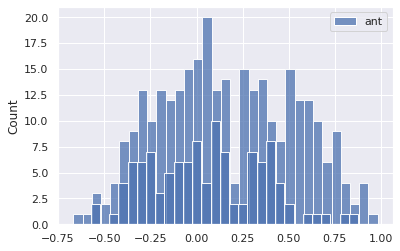

In [17]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)
#sns.histplot(data = nondat, binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

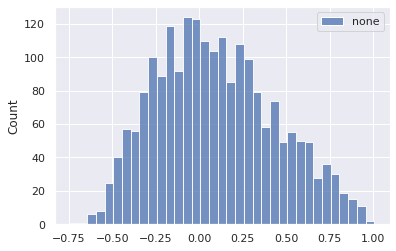

In [96]:
sns.histplot(data = nondat, binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

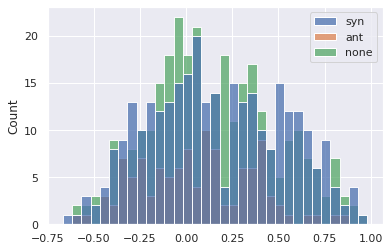

In [77]:
sns.histplot(data = syndat.join(antdat).join(nondat), binwidth = 0.05)

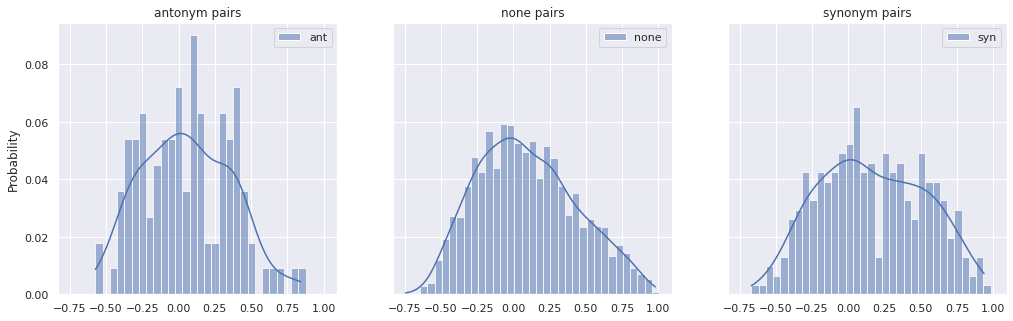

In [21]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True, sharex = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2],kde=True)
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0],kde=True)
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1],kde=True)
fig.savefig("mahalanobis_with_lines.png")

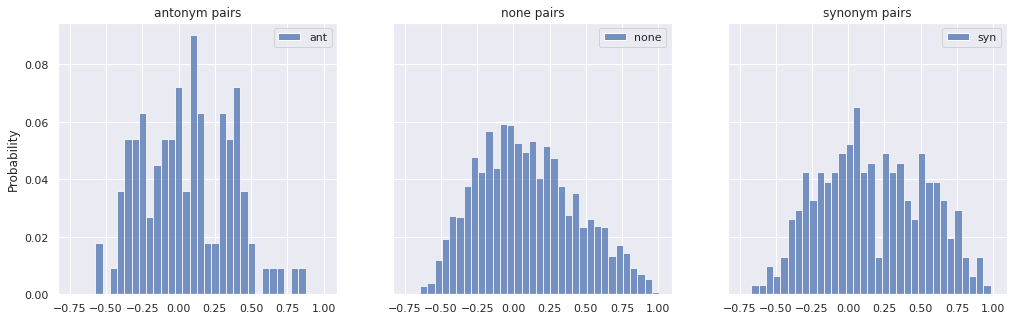

In [22]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True, sharex = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2])
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0])
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1])
fig.savefig("mahalanobis_no_lines.png")

In [29]:
len(simdict['COHYPONYMS'])

190

<AxesSubplot:ylabel='Count'>

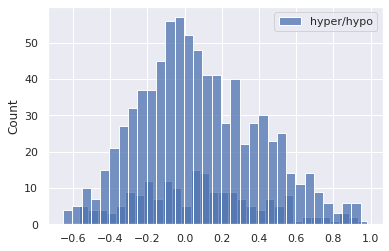

In [78]:
sns.histplot(data = cohdat, binwidth = 0.05)
sns.histplot(data = hypdat, binwidth = 0.05)

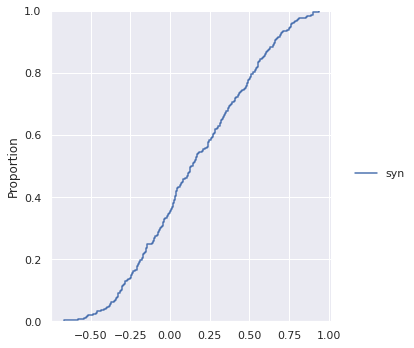

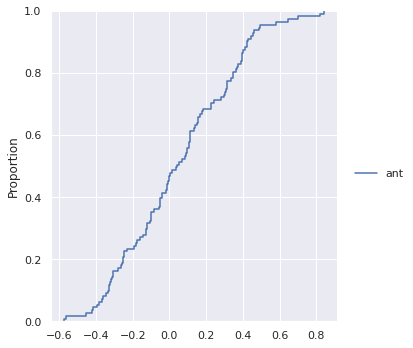

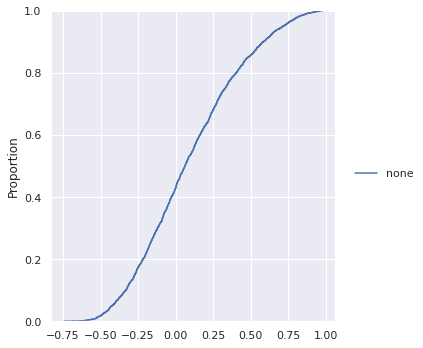

In [95]:
sns.displot(data = syndat, kind="ecdf")
sns.displot(data = antdat, kind="ecdf")
sns.displot(data = nondat, kind="ecdf")

In [90]:
#Next try 28 observables instead of 13

In [23]:
# Use as data the inner products of the vectors. Data of synonyms
syndat = {'syn' : [a for a in mf.averaged_product_list(simdict,'SYNONYMS',objsubset3,"maha").values()]}
syndat = pd.DataFrame(data = syndat)
#Antonym data
antdat = {'ant' : [a for a in mf.averaged_product_list(simdict,'ANTONYMS',objsubset3,"maha").values()]}
antdat = pd.DataFrame(data = antdat)
#None dat
nondat = {'none' : [a for a in mf.averaged_product_list(simdict,'NONE',objsubset3,"maha").values()]}
nondat = pd.DataFrame(data = nondat)
#Cohypo
cohdat = {'cohypo' : [a for a in mf.averaged_product_list(simdict,'COHYPONYMS',objsubset3,"maha").values()]}
cohdat = pd.DataFrame(data = cohdat)
#Hyper/hypo
hypdat = {'hyper/hypo' : [a for a in mf.averaged_product_list(simdict,'HYPER/HYPONYMS',objsubset3,"maha").values()]}
hypdat = pd.DataFrame(data = hypdat)

<AxesSubplot:ylabel='Count'>

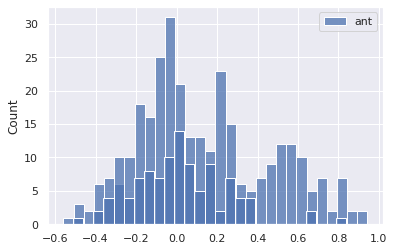

In [86]:
sns.histplot(data = syndat, binwidth = 0.05)
sns.histplot(data = antdat, binwidth = 0.05)
#sns.histplot(data = nondat, binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

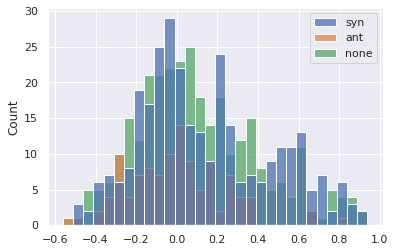

In [87]:
sns.histplot(data = syndat.join(antdat).join(nondat), binwidth = 0.05)

<AxesSubplot:ylabel='Count'>

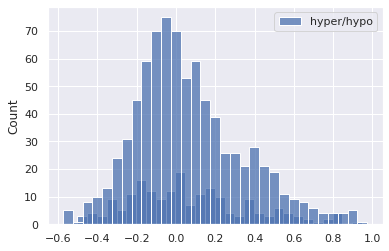

In [88]:
sns.histplot(data = cohdat, binwidth = 0.05)
sns.histplot(data = hypdat, binwidth = 0.05)

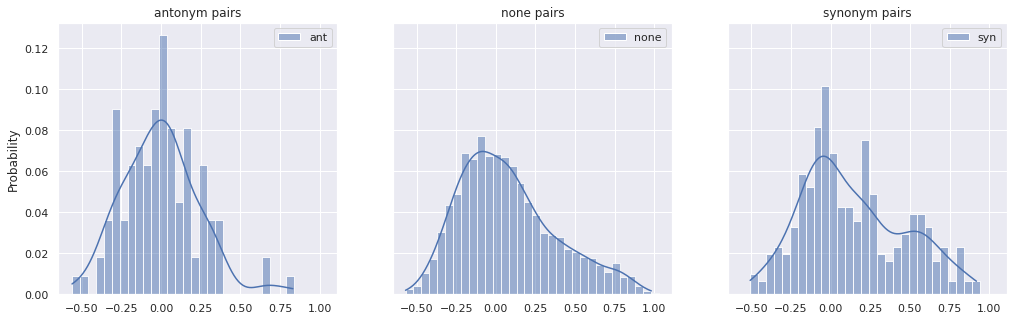

In [24]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True, sharex = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2],kde=True)
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0],kde=True)
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1],kde=True)
fig.savefig("mahalanobis_with_lines.png")

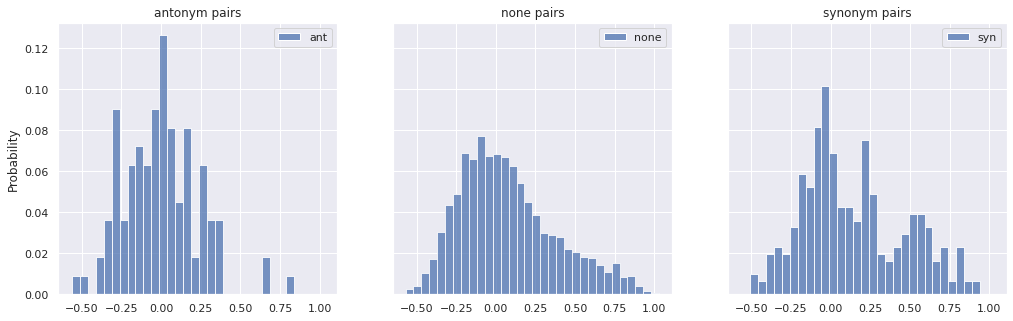

In [26]:
fig, axes = plt.subplots(1,3,figsize=(17,5),sharey = True, sharex = True)
axes[0].set_title("antonym pairs")
axes[1].set_title("none pairs")
axes[2].set_title("synonym pairs")
sns.histplot(data = syndat, binwidth = 0.05,stat = "probability",ax = axes[2])
sns.histplot(data = antdat, binwidth = 0.05,stat = "probability",ax = axes[0])
sns.histplot(data = nondat, binwidth = 0.05,stat = "probability",ax = axes[1])
fig.savefig("mahalanobis_no_lines.png")

## Precision is computed by averaging: function definition

In [ ]:
'''We decided to compute the recall on the binary classification problems: syn vs ant, syn vs non-syn,
   ant vs non-ant and hyper vs cohypo. Also, we compute the precision on the predictions for some of these classes'''

In [ ]:
# We decided to compute the precision by averaging over the precision in each category, which scales well
# for cases where the sample sizes are very different for syn/non/ant (we have ~300 syn ~100 ant ~2000 none)

In [29]:
def synvsant2(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [30]:
def synvsnonsyn2(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['ANTONYMS','NONE'],file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,['ANTONYMS','NONE'],file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [31]:
def antvsnonant2(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['SYNONYMS','NONE'],file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,['SYNONYMS','NONE'],file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [32]:
def hypohyper2(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'COHYPONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + ant1[1]/syn1[1] * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    return recall1

## Precision is computed by averaging: use better definition for divide

In [ ]:
'''We decided to compute the recall on the binary classification problems: syn vs ant, syn vs non-syn,
   ant vs non-ant and hyper vs cohypo. Also, we compute the precision on the predictions for some of these classes'''

In [ ]:
# We decided to compute the precision by averaging over the precision in each category, which scales well
# for cases where the sample sizes are very different for syn/non/ant (we have ~300 syn ~100 ant ~2000 none)

In [36]:
def synvsant4(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4*np.pi*np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [37]:
def synvsnonsyn4(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['ANTONYMS','NONE'],file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4*np.pi*np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,['ANTONYMS','NONE'],file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [38]:
def antvsnonant4(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,['SYNONYMS','NONE'],file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4*np.pi*np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,['SYNONYMS','NONE'],file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    #f1 score
    #precision1 = 2 * precision1 * recall1 /(precision1 + recall1)
    
    return recall1

In [39]:
def hypohyper4(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'COHYPONYMS',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    #Use the means and deviations to set the divide between synonyms and antonyms
    divide1 = ant1[0] + 4*np.pi* np.arctan(ant1[1]/syn1[1]) * (syn1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'COHYPONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'HYPER/HYPONYMS',file_name,"maha")
    
    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide1 for a in list(prodlist5.values())]

    #Compute the recall
    recall1 = 1/2*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1))
    
    #precision
    precision1 = 1/2*(syncomparison1.count(True)/(syncomparison1.count(True)+antcomparison1.count(False))+antcomparison1.count(True)/(antcomparison1.count(True)+syncomparison1.count(False)))
    
    return recall1

In [61]:
def synvsnonevsant4(file_name):
    #Using observable vectors with cosine distance

    #Compute the mean and the standard deviation for the SYNONYMS
    syn1 = mf.averaged_product(simdict,'SYNONYMS',file_name,"maha")
    
    #Compute the mean and the standard deviation for the NONE
    non1 = mf.averaged_product(simdict,'NONE',file_name,"maha")

    #Compute the mean and the standard deviation for the ANTONYMS
    ant1 = mf.averaged_product(simdict,'ANTONYMS',file_name,"maha")

    #Use the means and deviations to set the divide between synonyms and none
    divide1 = non1[0] + 4*np.pi*np.arctan(non1[1]/syn1[1]) * (syn1[0]-non1[0])/2

    #Use the means and deviations to set the divide between none and antonyms
    divide5 = ant1[0] + 4*np.pi*np.arctan(ant1[1]/non1[1]) * (non1[0]-ant1[0])/2
    
    # Use the earlier defined function to compute the list of scalar products of the verbs and compare with divide
    prodlist1 = mf.averaged_product_list(simdict,'SYNONYMS',file_name,"maha")

    prodlist5 = mf.averaged_product_list(simdict,'ANTONYMS',file_name,"maha")

    prodlist9 = mf.averaged_product_list(simdict,'NONE',file_name,"maha")

    # Compare and count the number of synonyms we get right
    syncomparison1 = [a > divide1 for a in list(prodlist1.values())]

    # Compare and count the number of none we get right
    noncomparison1 = [a > divide5 and a < divide1 for a in list(prodlist9.values())]

    # Compare and count the number of antonyms we get right
    antcomparison1 = [a < divide5 for a in list(prodlist5.values())]

    #Compute the average precision
    precision1 = 1/3*(syncomparison1.count(True)/len(syncomparison1) + antcomparison1.count(True)/len(antcomparison1) + noncomparison1.count(True)/len(noncomparison1))

    return precision1

## Recall syn vs ant

In [41]:
# Experiment 1 synonym vs antonym
[[synvsant2(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5488871224165341,
  0.550918565624448,
  0.5717629394099982,
  0.5419537184243066],
 [0.5873520579402932,
  0.5787405052110934,
  0.5807719484190073,
  0.5820526408761703],
 [0.5738827062356474,
  0.5763116057233705,
  0.5730436318671612,
  0.5342254018724607]]

In [47]:
[synvsant4(a) for a in file_list1]

[0.5689807454513337,
 0.5681858328917153,
 0.5583819113230878,
 0.5517576399929341]

In [42]:
# Experiment 1 synonym vs antonym
[[synvsant4(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

ZeroDivisionError: division by zero

## Recall syn vs non-syn

In [48]:
# Experiment 1 synonym vs antonym
[[synvsnonsyn2(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5387041386427529,
  0.5522297545757565,
  0.5609423745299693,
  0.5418801821999217],
 [0.5304022395407044,
  0.5393417197490007,
  0.5468740732832758,
  0.5173362751029027],
 [0.5402402642847823,
  0.5499982207038895,
  0.5624325350224784,
  0.5272172995029833]]

In [49]:
# Experiment 1 synonym vs antonym
[[synvsnonsyn4(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5461460446247465,
  0.5385647604474336,
  0.5356096461573134,
  0.5407903633322657],
 [0.5172087588816531,
  0.514983155996821,
  0.5195663262280108,
  0.5204544915364815],
 [0.5467776947439593,
  0.5367009477717282,
  0.5262134799473328,
  0.5313141287973144]]

## Recall ant vs non-ant

In [50]:
# Experiment 1 synonym vs antonym
[[antvsnonant2(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.49155241110222353,
  0.4822542425710412,
  0.4927221928055609,
  0.4918415706243968],
 [0.4495191314699443,
  0.46449158620896847,
  0.46219896428316604,
  0.4227474660988625],
 [0.4535598541434306,
  0.4638193842028773,
  0.4739512334343514,
  0.49041642726511425]]

In [51]:
# Experiment 1 synonym vs antonym
[[antvsnonant4(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.4971309366890859,
  0.4828306839561529,
  0.5023883825467819,
  0.49447592653094946],
 [0.4943595116583862,
  0.4767583339905141,
  0.4770474935126874,
  0.477208972206888],
 [0.498910957643763,
  0.4995362181689818,
  0.5056142011123254,
  0.5374499134399092]]

## Recall Hyper vs Hypo

In [52]:
# Experiment 1 synonym vs antonym
[[hypohyper2(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5132236842105263,
  0.5088486842105263,
  0.4820394736842105,
  0.5636842105263158],
 [0.52875, 0.506578947368421, 0.5158552631578948, 0.5407894736842105],
 [0.505296052631579,
  0.5084210526315789,
  0.4915131578947368,
  0.5615131578947369]]

In [53]:
# Experiment 1 synonym vs antonym
[[hypohyper4(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.5108223684210527,
  0.5136184210526316,
  0.4831578947368421,
  0.5429605263157895],
 [0.5384539473684211,
  0.5346052631578948,
  0.5219736842105264,
  0.5488815789473684],
 [0.5156578947368421,
  0.506546052631579,
  0.4869078947368421,
  0.5318421052631579]]

## Recall Syn vs None vs ant

In [62]:
# Experiment 1 synonym vs antonym
[[synvsnonevsant4(a) for a in localf] for localf in [file_list1,file_list2,file_list3]]

[[0.37372607705088523,
  0.3591392325407671,
  0.35721051705706436,
  0.36015348419440496],
 [0.40814343755520227,
  0.4138844727080021,
  0.4220691279514808,
  0.4549843961608667],
 [0.3993131857581985,
  0.4027622237340907,
  0.3883692157349446,
  0.35987406703519237]]

# Comparison: flat vs Maha

In [128]:
#Syn vs ant
[[synvsant1(a) for a in file_list1],[synvsant2(a) for a in file_list3]]

[[0.5602808691043986,
  0.5545398339515986,
  0.5565712771595125,
  0.5234499205087441],
 [0.5738827062356474,
  0.5763116057233705,
  0.5730436318671612,
  0.5342254018724607]]

In [129]:
# Syn vs non-syn
[[synvsnonsyn1(a) for a in file_list1],[synvsnonsyn2(a) for a in file_list3]]

[[0.549286502259706,
  0.5644461051208143,
  0.5683946597392737,
  0.5495133625137896],
 [0.5402402642847823,
  0.5499982207038895,
  0.5624325350224784,
  0.5272172995029833]]

In [130]:
# Ant vs non-ant
[[antvsnonant1(a) for a in file_list1],[antvsnonant2(a) for a in file_list3]]

[[0.4996939415447127,
  0.5006553030729771,
  0.4966953197465911,
  0.5265125483966668],
 [0.4535598541434306,
  0.4638193842028773,
  0.4739512334343514,
  0.49041642726511425]]

In [131]:
# Hyper/hypo vs cohypo
[[hypohyper1(a) for a in file_list1],[hypohyper2(a) for a in file_list3]]

[[0.5248026315789474,
  0.5194078947368421,
  0.5286842105263159,
  0.5505921052631579],
 [0.505296052631579,
  0.5084210526315789,
  0.4915131578947368,
  0.5615131578947369]]

In [99]:
mf.averaged_product_list(simdict,'SYNONYMS',objsubset3,"maha")

{('take', 'remove'): 0.05333230896639107,
 ('shine', 'polish'): 0.16235516848618092,
 ('bake', 'broil'): 0.28948777357667116,
 ('decay', 'decompose'): 0.5445967702417007,
 ('jump', 'skip'): 0.46027377532356994,
 ('go', 'move'): -0.05204735585692516,
 ('thaw', 'melt'): 0.2979185548225758,
 ('see', 'meet'): 0.16186812298277814,
 ('claim', 'take'): -0.2150729374306289,
 ('sting', 'prick'): 0.8863593031763863,
 ('search', 'seek'): 0.2043643949718246,
 ('alter', 'change'): 0.284600216530576,
 ('disturb', 'interrupt'): -0.03675559267781458,
 ('seem', 'appear'): 0.2271378879707521,
 ('have', 'hold'): 0.1034603935011828,
 ('travel', 'move'): 0.003358913935313452,
 ('travel', 'go'): -0.07996937779616323,
 ('start', 'begin'): 0.02241424551605661,
 ('prepare', 'cook'): 0.4302618801290346,
 ('let', 'allow'): -0.08977739494468376,
 ('look', 'appear'): -0.006285893332194711,
 ('float', 'drift'): 0.09875632832852282,
 ('suppose', 'guess'): -0.17187570678309158,
 ('call', 'yell'): -0.2574112064670324,

In [111]:
mf.averaged_product_list(simdict,'ANTONYMS',objsubset3,"maha")

{('feed', 'starve'): -0.2967050427642526,
 ('connect', 'separate'): 0.6668901483956435,
 ('forget', 'recall'): -0.012282019654222943,
 ('sell', 'purchase'): -0.1542564868254181,
 ('melt', 'freeze'): -0.2955884411822633,
 ('agree', 'differ'): 0.09303536519196376,
 ('buy', 'sell'): 0.09228603396240681,
 ('arrive', 'depart'): 0.24144974200576758,
 ('disbelieve', 'believe'): 0.06715140276658801,
 ('separate', 'combine'): -0.17977754558708756,
 ('finish', 'start'): 0.007287906113417849,
 ('implode', 'explode'): 0.3079754559801736,
 ('lose', 'find'): 0.1415841776237894,
 ('reject', 'accept'): 0.010578888668356472,
 ('defend', 'prosecute'): 0.2517658253930243,
 ('sit', 'lie'): 0.2730597973262059,
 ('sink', 'float'): -0.06985857724538495,
 ('fall', 'rise'): 0.19647094763030157,
 ('climb', 'fall'): 0.03537669329991459,
 ('accept', 'deny'): 0.14015846141108046,
 ('admit', 'give'): 0.1450617412259738,
 ('permit', 'deny'): -0.017379763906112473,
 ('accept', 'refuse'): 0.6666875141305157,
 ('move',

In [101]:
objsubset1['blend'].val

array([ 5.47415060e-01, -4.33280896e+00,  4.84024258e+00,  2.13637135e-01,
        6.42724502e-02,  9.91527351e-03,  4.75557120e+00,  3.32840623e+00,
        4.59378328e-01,  1.87732334e+01,  4.79736123e-02,  2.99663248e-01,
       -2.37184488e+00])

In [102]:
objsubset1['mix'].val

array([ 6.06807093e-02, -5.86366064e+00,  7.86317349e+00,  5.84740263e-02,
        1.86328809e-01,  1.74429559e-01,  1.50326556e+01,  6.00726963e+00,
       -6.33859732e-01,  3.43825160e+01,  8.09107359e-02,  3.68214848e-03,
       -3.55811086e-01])

In [103]:
mf.M_vec_mult_dev_Maha(objsubset1['mix'].val,objsubset1['mix'].val,objsubset1.mean,objsubset1.inv_cov)

5.725572296271304

In [104]:
mf.M_vec_mult_dev_Maha(objsubset1['blend'].val,objsubset1['blend'].val,objsubset1.mean,objsubset1.inv_cov)

19.32612631162237

In [105]:
mf.M_vec_mult_dev_Maha(objsubset1['mix'].val,objsubset1['blend'].val,objsubset1.mean,objsubset1.inv_cov)

6.936347453028846

In [106]:
np.sqrt(19.3*5.7)

10.488565202161828

In [107]:
mf.M_vec_mult_dev_Maha(objsubset1['associate'].val,objsubset1['associate'].val,objsubset1.mean,objsubset1.inv_cov)

0.6681389930293269

In [108]:
mf.M_vec_mult_dev_Maha(objsubset1['connect'].val,objsubset1['connect'].val,objsubset1.mean,objsubset1.inv_cov)

5.5100562839049525

In [109]:
mf.M_vec_mult_dev_Maha(objsubset1['associate'].val,objsubset1['connect'].val,objsubset1.mean,objsubset1.inv_cov)

0.3195178579650959

In [110]:
np.sqrt(5.5*0.66)

1.905255888325765

In [112]:
mf.M_vec_mult_dev_Maha(objsubset1['finish'].val,objsubset1['finish'].val,objsubset1.mean,objsubset1.inv_cov)

5.142830015755015

In [113]:
mf.M_vec_mult_dev_Maha(objsubset1['start'].val,objsubset1['start'].val,objsubset1.mean,objsubset1.inv_cov)

69.32753187721872

In [114]:
mf.M_vec_mult_dev_Maha(objsubset1['finish'].val,objsubset1['start'].val,objsubset1.mean,objsubset1.inv_cov)

4.237217032800108

In [119]:
np.sqrt(5.1*69)

18.758997841036177

In [115]:
mf.M_vec_mult_dev_Maha(objsubset1['delay'].val,objsubset1['delay'].val,objsubset1.mean,objsubset1.inv_cov)

2.650244507560363

In [117]:
mf.M_vec_mult_dev_Maha(objsubset1['hurry'].val,objsubset1['hurry'].val,objsubset1.mean,objsubset1.inv_cov)

2.5974754190411433

In [118]:
mf.M_vec_mult_dev_Maha(objsubset1['delay'].val,objsubset1['hurry'].val,objsubset1.mean,objsubset1.inv_cov)

1.126431072229135

In [127]:
0.1/np.sqrt(3*0.5)

0.08164965809277261

In [4]:
len(simdict['SYNONYMS'])

306

In [5]:
len(simdict['ANTONYMS'])

111

In [32]:
len(simdict['COHYPONYMS'])

190

In [33]:
len(simdict['HYPER/HYPONYMS'])

800

In [34]:
print(mf.averaged_product(simdict,'NONE',objsubset1,"plain_dev"))

[0.19449852834670114, 0.7286991448892701]


In [36]:
[[mf.averaged_product(simdict,'COHYPONYMS',a,"std_dev") for a in b] for b in [file_list1,file_list2,file_list3]]

[[[0.18283011891159115, 0.4875770015152735],
  [0.1865230024425557, 0.47703140544767303],
  [0.193787209750406, 0.4717811907126341],
  [0.240215784303051, 0.5059754138407245]],
 [[0.31531163054484945, 0.5149285441313115],
  [0.32339161000833416, 0.49594675300859004],
  [0.333440748425028, 0.48336781321665245],
  [0.4466865840241602, 0.5617302869991032]],
 [[0.20377438501264636, 0.4530870300342831],
  [0.20420227553796666, 0.4501316317396267],
  [0.2089174227031328, 0.4517869568158021],
  [0.25593326887468926, 0.4842001288953564]]]

In [37]:
#Hyper/hyponym pairs vs cohyponym pairs
[[[mf.averaged_product(simdict,'HYPER/HYPONYMS',a,"std_dev"),mf.averaged_product(simdict,'COHYPONYMS',a,"std_dev")] for a in b] for b in [file_list1,file_list2,file_list3]]

[[[[0.12819513814742128, 0.5071554695289946],
   [0.18283011891159115, 0.4875770015152735]],
  [[0.1302268730352817, 0.5047809468546545],
   [0.1865230024425557, 0.47703140544767303]],
  [[0.13413771448778683, 0.5014386364259339],
   [0.193787209750406, 0.4717811907126341]],
  [[0.12538794135946613, 0.5024734689765858],
   [0.240215784303051, 0.5059754138407245]]],
 [[[0.23430703642978412, 0.4918431036851528],
   [0.31531163054484945, 0.5149285441313115]],
  [[0.23239728478787797, 0.4896192077598706],
   [0.32339161000833416, 0.49594675300859004]],
  [[0.23265881542388137, 0.4885868888170528],
   [0.333440748425028, 0.48336781321665245]],
  [[0.3231436801778295, 0.5651977514993983],
   [0.4466865840241602, 0.5617302869991032]]],
 [[[0.133299760494055, 0.4588170772144774],
   [0.20377438501264636, 0.4530870300342831]],
  [[0.13644245116332462, 0.45804412047494086],
   [0.20420227553796666, 0.4501316317396267]],
  [[0.14087734413300423, 0.4575093618111323],
   [0.2089174227031328, 0.4517

## CoHyponym lengths

In [42]:
objsubset1['abandon'].val

array([-0.66684582, -2.11659776, 16.72542505,  0.61158851,  0.71535442,
        0.10775297, 21.11985818, 15.35261374,  0.47499309,  4.47998606,
        0.18523731,  0.44468334,  1.41144436])

In [43]:
simdict['COHYPONYMS']

[['walk', 'trail', 4.81],
 ['attack', 'sneak', 1.66],
 ['drive', 'walk', 1.49],
 ['tear', 'break', 6.14],
 ['give', 'bring', 4.98],
 ['sing', 'hum', 5.98],
 ['respect', 'like', 5.48],
 ['pull', 'lift', 2.82],
 ['color', 'decorate', 4.48],
 ['dump', 'waste', 5.98],
 ['kick', 'punch', 1.66],
 ['brush', 'paint', 6.97],
 ['boom', 'crash', 6.31],
 ['get', 'ask', 2.49],
 ['weave', 'drive', 0.91],
 ['cook', 'mix', 3.49],
 ['ridicule', 'tease', 8.47],
 ['disintegrate', 'dissolve', 8.13],
 ['smear', 'wipe', 6.31],
 ['drip', 'sink', 1.99],
 ['strike', 'blow', 7.3],
 ['sprinkle', 'pour', 2.66],
 ['glance', 'stare', 2.49],
 ['lie', 'deceive', 9.3],
 ['blow', 'pop', 2.49],
 ['sip', 'gulp', 2.99],
 ['cover', 'bury', 6.97],
 ['hit', 'beat', 7.97],
 ['shake', 'dance', 5.15],
 ['bake', 'fry', 4.81],
 ['add', 'multiply', 3.15],
 ['blow', 'whistle', 2.82],
 ['lean', 'stand', 3.98],
 ['blow', 'hit', 3.15],
 ['float', 'swim', 4.65],
 ['spill', 'pour', 4.65],
 ['retreat', 'run', 5.64],
 ['erode', 'deteriora

In [47]:
test1 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['COHYPONYMS']]

In [51]:
test1

[[6.803167411867327, 2.368400933411927],
 [30.49524605621724, 2.5751458230264817],
 [10.127047263078987, 6.803167411867327],
 [2.7223709485336816, 11.017800555471329],
 [174.83944940063265, 46.85459432239316],
 [3.8135967471381065, 2.4866063573440282],
 [1.0955469353855936, 3.880419506091338],
 [2.8412323106449993, 9.47582443329093],
 [2.3883063580872523, 2.9775295279915515],
 [1.8684818486833055, 2.86177629131433],
 [3.5413386224115415, 2.2482049340722865],
 [3.443190640808203, 5.967949708597222],
 [2.5348687086937205, 3.4657190278032797],
 [206.43046581963043, 36.096612413796464],
 [3.5553934958134343, 10.127047263078987],
 [3.3036012057165025, 3.2803473459064953],
 [4.757248463677444, 2.7726050677862424],
 [2.8896119146378885, 2.3958706858977163],
 [3.1425907286929067, 1.5231906270590838],
 [2.7018716428144467, 2.1498524811622337],
 [24.666396432620225, 1.432025316119547],
 [2.994331250901441, 5.172562285988424],
 [3.1125302224414684, 3.5636814301710737],
 [5.631315532829758, 2.2409

In [58]:
#Compute the lengths of the single words in the cohyponym list
test1 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['COHYPONYMS']]
#Compute the ratios among the pairs, the shortest over the longest and average out
(lambda x: [np.mean(x),np.std(x)])([a[0]/a[1] if a[0]<a[1] else a[1]/a[0] for a in test1])

[0.47947067492124684, 0.3162972242324257]

In [59]:
#Compute the lengths of the single words in the hyper/hyponym list
test2 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['HYPER/HYPONYMS']]
#Compute the ratios among the pairs, the shortest over the longest and average out
(lambda x: [np.mean(x),np.std(x)])([a[0]/a[1] if a[0]<a[1] else a[1]/a[0] for a in test2])

[0.3876835135814728, 0.3018850194295431]

In [60]:
test2

[[4.738961022741927, 42.18453431506988],
 [2.5481967302089665, 2.59122684755926],
 [1.8804484487927657, 2.0655066562002764],
 [19.74065716836946, 11.739971015801938],
 [2.5690019437751497, 10.135243241088403],
 [1.7342158407856703, 73.07842925418663],
 [1.436413412495542, 3.097214598572989],
 [3.1552229744919695, 1.9740086597381177],
 [6.0975135214506695, 4.23774142517098],
 [59.294443509139924, 3.543185028445923],
 [103.91331289728214, 6.0975135214506695],
 [3.0246796663372457, 10.814923255969031],
 [73.07842925418663, 1.6944370001260862],
 [65.61064585125379, 25.6985364828244],
 [2.1031160250467593, 2.552945326774769],
 [238.3845131357383, 34.34319200261542],
 [1.8860611424261768, 1.4444759712613464],
 [10.127047263078987, 24.18051578475127],
 [36.096612413796464, 74.13564649175945],
 [6.725565169140313, 2.3559315499078304],
 [32.58464034559824, 3.1436508767367455],
 [3.4767354834100983, 3.4532584045085573],
 [1.4518970312350945, 3.1050513332977396],
 [3.3036012057165025, 3.532741475

In [7]:
#Compute the lengths of the single words in the synonyms list
test3 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['SYNONYMS']]
#Compute the ratios among the pairs, the shortest over the longest and average out
(lambda x: [np.mean(x),np.std(x)])([a[0]/a[1] if a[0]<a[1] else a[1]/a[0] for a in test3])

[0.4493200302643336, 0.30430859654485787]

In [8]:
test3

[[238.3845131357383, 13.318714705903826],
 [2.927556442013851, 4.358518751602692],
 [3.5327414756047757, 2.9917926267895223],
 [3.1552229744919695, 2.399069229794482],
 [1.344751539741535, 1.3814651469840225],
 [73.07842925418663, 11.739971015801938],
 [3.2944089437014696, 3.9694065201687154],
 [102.81909903905562, 18.952239674468682],
 [24.974737002736646, 238.3845131357383],
 [2.6551255989324534, 3.348549408398529],
 [1.1696432356760489, 32.67852522846102],
 [2.1501154328124223, 41.00846544045668],
 [2.3497984285368183, 1.2666635635954375],
 [15.800870221917286, 11.495722388417164],
 [786.0674664255126, 76.0304280500765],
 [5.311275226193702, 11.739971015801938],
 [5.311275226193702, 73.07842925418663],
 [57.492518828181176, 129.1660212153226],
 [4.685803192726374, 3.3036012057165025],
 [9.627839158697439, 70.20934352164981],
 [4.331167305025081, 11.495722388417164],
 [3.1287539110954117, 2.5169287916196237],
 [1.9593928201614923, 4.58692903101695],
 [72.47870975751172, 2.25247135037

In [9]:
simdict['SYNONYMS']

[['take', 'remove', 6.81],
 ['shine', 'polish', 7.8],
 ['bake', 'broil', 5.98],
 ['decay', 'decompose', 8.3],
 ['jump', 'skip', 5.48],
 ['go', 'move', 6.31],
 ['thaw', 'melt', 8.47],
 ['see', 'meet', 5.31],
 ['claim', 'take', 5.15],
 ['sting', 'prick', 6.31],
 ['search', 'seek', 9.63],
 ['alter', 'change', 9.63],
 ['disturb', 'interrupt', 8.63],
 ['seem', 'appear', 7.64],
 ['have', 'hold', 4.81],
 ['travel', 'move', 6.47],
 ['travel', 'go', 7.97],
 ['start', 'begin', 8.8],
 ['prepare', 'cook', 6.14],
 ['let', 'allow', 8.8],
 ['look', 'appear', 4.98],
 ['float', 'drift', 7.3],
 ['suppose', 'guess', 7.14],
 ['call', 'yell', 7.64],
 ['associate', 'connect', 6.97],
 ['reply', 'respond', 9.79],
 ['demand', 'need', 2.82],
 ['take', 'choose', 3.82],
 ['remember', 'recall', 9.13],
 ['keep', 'hold', 6.14],
 ['make', 'do', 4.15],
 ['rise', 'lift', 7.47],
 ['see', 'hear', 1.99],
 ['blend', 'mix', 8.3],
 ['help', 'assist', 8.0],
 ['bury', 'forget', 3.98],
 ['learn', 'teach', 2.82],
 ['organize', '

In [10]:
#Compute the lengths of the single words in the ANTONYMS list
test4 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['ANTONYMS']]
#Compute the ratios among the pairs, the shortest over the longest and average out
(lambda x: [np.mean(x),np.std(x)])([a[0]/a[1] if a[0]<a[1] else a[1]/a[0] for a in test4])

[0.391423241336934, 0.29135743451140045]

In [11]:
test4

[[2.8292377033970784, 3.604372696020856],
 [3.03222377691939, 3.1453322494740688],
 [5.2804399868518885, 1.9805210329567882],
 [19.81048195195071, 8.585759829480418],
 [3.9694065201687154, 2.7604593742198618],
 [19.85722924735155, 2.810559400447316],
 [11.879513417242636, 19.81048195195071],
 [3.5345435895160846, 2.57368100495911],
 [2.118258961317356, 3.712232889767299],
 [3.1453322494740688, 15.162581664675404],
 [4.02356648217105, 57.492518828181176],
 [2.5661813953963493, 1.7874969766566853],
 [44.13749814862019, 124.31314124635975],
 [17.98333386464949, 136.04882129345532],
 [4.23774142517098, 2.0524497298325906],
 [2.401348121644997, 5.631315532829758],
 [2.1498524811622337, 3.1287539110954117],
 [3.5383084550414874, 1.6245816319532058],
 [8.972902738479725, 3.5383084550414874],
 [136.04882129345532, 21.652847007113774],
 [4.3150470518896675, 174.83944940063265],
 [4.75137848481351, 21.652847007113774],
 [136.04882129345532, 86.93414492776819],
 [11.739971015801938, 4.27674077654

In [12]:
simdict['ANTONYMS']

[['feed', 'starve', 1.49],
 ['connect', 'separate', 1.49],
 ['forget', 'recall', 0.33],
 ['sell', 'purchase', 2.16],
 ['melt', 'freeze', 0.17],
 ['agree', 'differ', 1.16],
 ['buy', 'sell', 0.0],
 ['arrive', 'depart', 1.0],
 ['disbelieve', 'believe', 0.33],
 ['separate', 'combine', 0.5],
 ['finish', 'start', 0.5],
 ['implode', 'explode', 3.15],
 ['lose', 'find', 0.0],
 ['reject', 'accept', 0.83],
 ['defend', 'prosecute', 0.33],
 ['sit', 'lie', 3.32],
 ['sink', 'float', 0.33],
 ['fall', 'rise', 0.33],
 ['climb', 'fall', 1.49],
 ['accept', 'deny', 1.0],
 ['admit', 'give', 2.32],
 ['permit', 'deny', 0.5],
 ['accept', 'refuse', 1.83],
 ['move', 'stay', 0.5],
 ['remove', 'add', 0.17],
 ['permit', 'disallow', 1.66],
 ['appear', 'vanish', 1.83],
 ['divide', 'unite', 0.17],
 ['sit', 'rise', 0.3],
 ['go', 'stay', 0.0],
 ['allow', 'deny', 0.17],
 ['mend', 'break', 1.0],
 ['follow', 'lead', 0.17],
 ['detach', 'attach', 0.33],
 ['begin', 'stop', 0.33],
 ['swim', 'dip', 3.15],
 ['ascend', 'descend',

In [13]:
#Compute the lengths of the single words in the NONE list
test5 = [[mf.M_vec_mult_dev(objsubset1[a[0]].val,objsubset1[a[0]].val,objsubset1.mean,objsubset1.std),mf.M_vec_mult_dev(objsubset1[a[1]].val,objsubset1[a[1]].val,objsubset1.mean,objsubset1.std)] for a in simdict['NONE']]
#Compute the ratios among the pairs, the shortest over the longest and average out
(lambda x: [np.mean(x),np.std(x)])([a[0]/a[1] if a[0]<a[1] else a[1]/a[0] for a in test5])

[0.438989429180678, 0.3076675428230437]

In [63]:
subobjset3.mean

array([-1.84904324e-02,  1.49126287e+00,  2.13274947e+01,  1.44855555e-01,
        1.85585767e-01,  2.43866839e-01,  2.14635736e+01,  2.39400527e+01,
        7.02412394e-01,  3.25449030e+01,  2.18269921e-01,  1.72820286e-01,
        1.47372765e-01,  4.87359019e-03,  1.22413685e-01, -1.21771457e-02,
        4.85183686e-01,  8.46264052e-01,  3.19831771e-01,  2.10249098e+00,
        5.37596780e+02,  2.22599355e+02,  1.77309156e+04,  1.27785771e-02,
        1.18815613e+00,  2.45380175e+01,  3.25472860e-01,  3.31186212e-01])

In [64]:
subobjset3.std

array([4.15305177e-01, 5.50645422e+00, 3.42697451e+01, 5.62078326e-01,
       7.10571857e-01, 7.90053610e-01, 4.62657836e+01, 5.51072123e+01,
       4.90353284e+00, 1.29119111e+02, 3.72244160e-01, 4.73498820e-01,
       5.03109640e+00, 7.70399078e-02, 1.10855314e+00, 6.78441885e-01,
       3.42258459e+00, 8.14349925e+00, 8.34598989e+00, 1.41130897e+02,
       4.46080868e+03, 4.81232587e+03, 1.70693798e+05, 8.67082958e-02,
       6.78762551e+00, 3.90154026e+02, 5.79932604e+00, 6.64766995e+00])